In [ ]:
#XOR_nn.ipynb

#Version 0

#A two input (one output) XOR logic neural network

#Google Colab
#Date: 28 April 2022
#updated: 15 February 2025

#James Canova
#jscanova@gmail.com

#Based on:
#[1])"Make your own Neural Network"
#   https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork/

In [ ]:
#--------------------------------------------------------
#import Python libraries

#for array operations
import numpy as np

#for generating random numbers to initialize weights and biases
import random as rnd

#for measuring training time
import time

#for plotting cost
import matplotlib.pyplot as plt

In [ ]:
np.version.version

'1.26.4'

In [ ]:
#--------------------------------------------------------
#Hyperparameters (i.e. they control the solution)
#note: these were selected by trial and error
LEARNING_RATE = 0.04
EPOCHS = 20000

In [ ]:
#--------------------------------------------------------
#setup variables
global bglobal_Trained
bglobal_Trained = False

#for tracking training time
global fglobal_training_time
fglobal_training_time = 0.0

#for graphing error
global nglobal_epoch_number
nglobal_epoch_number = np.zeros(EPOCHS)  # a numpy array initialized as all zeros

global fglobal_cost
fglobal_cost = np.zeros(EPOCHS) #a numpy array initialized as all zeros

In [ ]:
# This sets the starting point for the random number generator which produces
#the initial values for the weights and biases and will result in the same
#performance of the neural network each time it is trained.

# I found that the performance of the neural network depends on the the initial
#values of the weights and biases and had to find a seed value by trial and error
rnd.seed(30)   #an integer between 0 and 30

In [ ]:
#--------------------------------------------------------
#calculate cost associated with error value
def cost(error):

  cost_value =  0.5 * error**2.0

  return cost_value


In [ ]:
#--------------------------------------------------------
#the activation function
#x is a scalar, value returned is a scalar
def sigmoid (x):

    return 1/(1 + np.exp(-x))

In [ ]:
#--------------------------------------------------------
#for initializing weights and biases between and including:-1, 1
#shape contains dimensions of required matrix
def create_random_array(shape):

    new_array = np.zeros(shape)

    nRows = shape[0]
    nColumns = shape[1]

    for i in range(nRows):
        for j in range(nColumns):
            new_array[i][j] += rnd.uniform(-1, 1)
    return new_array

In [ ]:
#--------------------------------------------------------
#Neural network class
class neuralNetwork:

    # initialise the neural network
    # note: one hidden layer only
    # inputnodes = number of input nodes (i.e neurons or perceptrons)
    # hiddennodes = number of hidden nodes
    # ouptutnodes = numper of output nodes
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate, epochs):

        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        #Initialize weights and bias with random numbers, -1 <= num <= 1
        self.wih = create_random_array((inputnodes, hiddennodes))   # 2 x 2
        self.who = create_random_array((outputnodes, hiddennodes))  # 1 x 2

        self.bih = create_random_array((hiddennodes,1))  # 2 x 1, added to hidden nodes
        self.bho = create_random_array((outputnodes,1))  # 1 x 1, added to output node

       # set learning rate
        self.lr = learningrate

        # set number of epochs
        self.epochs = epochs


    # to train, note: targets are the outputs
    # inputs is a 4 x 2 numpy array, each row is a pair of input values
    # targets is a 4 x 1 numpy array
    def train(self, inputs, targets):

        # interate through epochs
        for c1 in range(self.epochs):

          epoch_cost = 0.0  # error per epoch for plotting cost

          # interate through 4 inputs
          for c2 in range(inputs.shape[0]):  #inputs.shape[0] equals the number of input pairs which is 4

            input = inputs[c2,:]   #input is a 1 x 2 numpy array
            input = np.transpose([input]) # 2 x 1

            target = targets[c2,:]   #target is a 1 x 1 numpy array

            #forward propagation-----
            #calculate hidden outputs from inputs
            hidden_sums = np.dot(self.wih, input) + self.bih # 2 x 2 . 2 x 1 + 2 x 1 = 2 x 1
            hidden_outputs = sigmoid(hidden_sums)  # 2 x 1

            #calculate predicted output from hidden outputs
            output_sum = np.dot(self.who, hidden_outputs) + self.bho # 1 x 2 . 2 x 1 + 1 x 1 = 1 x 1
            final_output = sigmoid(output_sum)  # 1 x 1


            #backward propagation-----
            #update weights for hidden to output layer
            output_error = target - final_output   #1 x 1 - 1 x 1
            dWho = self.lr * np.dot((output_error * final_output * \
                           (1.0 - final_output)), hidden_outputs.T) # 1 x 2
            self.who += dWho

            #update bias for output layer
            dbho = self.lr * output_error * \
                      (final_output * (1.0 - final_output)) # 1 x 1
            self.bho += dbho # 1 x 1


            #update weights for hidden layer
            hidden_error = np.dot(self.who.T, output_error) # 2 x 1 . 1 x 1  [Ref. 2, pp. 79-82 & p. 171]
            dWih = self.lr * np.dot((hidden_error * hidden_outputs * \
                           (1.0 - hidden_outputs)), input.T) # 1 x 2
            self.wih += dWih  # 2 x 1

            #update bias(es) for input to hidden layer
            dbih = self.lr * hidden_error * (hidden_outputs * (1.0 - hidden_outputs)) # 2 x 1
            self.bih += dbih  # 2 x 1

            #for plotting cost vs epochs
            epoch_cost += cost(output_error.item())

          fglobal_cost[c1] = epoch_cost
          nglobal_epoch_number[c1] = c1

        bglobal_Trained = True


    # to query (i.e. infer results)
    def query(self, input):

      #calculate hidden outputs from inputs
      hidden_sums = np.dot(self.wih, input) + self.bih  # 2 x 2 . 2 x 1 + 2 x 1 = 2 x 1
      hidden_outputs = sigmoid(hidden_sums)  # 2 x 1

      #calculate predicted output from hidden outputs
      output_sum = np.dot(self.who, hidden_outputs) + self.bho   # 1 x 2 . 2 x 1 + 1 x 1 = 1 x 1
      inferred_output = sigmoid(output_sum)  # 1 x 1

      return inferred_output # 1 x 1


In [ ]:
#--------------------------------------------------------
# initialize the neural network

# number of input, hidden and output nodes
input_nodes = 2
hidden_nodes = 2
output_nodes = 1

# create instance of neural network
nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, LEARNING_RATE, EPOCHS)

In [ ]:
#--------------------------------------------------------
#train the neural network
#define the training dataset, which are inputs and targets (outputs)
inputs_array= np.array([[0,0],[0,1],[1,0],[1,1]])
targets_array = np.array([[0],[1],[1],[0]])

training_start_time = time.time()

print("Training has started and will take less than 10 [sec]....")
nn.train(inputs_array, targets_array)
print("Training complete.")

training_end_time = time.time()
fglobal_training_time = training_end_time - training_start_time

bglobal_Trained = True

Training has started and will take less than 10 [sec]....
Training complete.


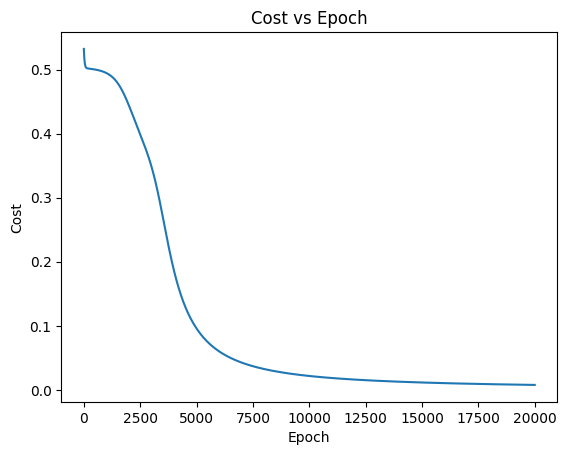


                     Summary:
        Learning rate for training:  0.04
        Number of epochs for training: 20,000
        Training time: 10.3 [sec] 


Enter first input (0 or 1):
Enter second input (0 or 1):

Inputs are: 0 and 0 
Output inferred by neural network is: 0.06 
Output should be:  0
Press Y or y to continue.
Enter first input (0 or 1):
Enter second input (0 or 1):

Inputs are: 1 and 0 
Output inferred by neural network is: 0.93 
Output should be:  1
Press Y or y to continue.
Enter first input (0 or 1):
Enter second input (0 or 1):

Inputs are: 0 and 1 
Output inferred by neural network is: 0.93 
Output should be:  1
Press Y or y to continue.
Enter first input (0 or 1):
Enter second input (0 or 1):

Inputs are: 1 and 1 
Output inferred by neural network is: 0.06 
Output should be:  0
Press Y or y to continue.


KeyboardInterrupt: Interrupted by user

In [ ]:
#--------------------------------------------------------
#main loop for queries once neural nework is trained
bPlotted = False
while True:

    if bglobal_Trained == True:  #then query

        if not bPlotted:
          print("")
          plt.plot(nglobal_epoch_number, fglobal_cost)
          plt.title('Cost vs Epoch')
          plt.xlabel('Epoch')
          plt.ylabel('Cost')
          plt.show()

          #print Hyperparameters and training time
          print("")
          print("                     Summary:")
          print("        Learning rate for training: ", LEARNING_RATE)
          print("        Number of epochs for training: {:,}".format(EPOCHS))
          print("        Training time: {:.1f} [sec] ".format(fglobal_training_time))
          print("")
          print("")

          bPlotted = True

        #get inputs from user
        print("Enter first input (0 or 1):")
        nValueInput1 = int(input())

        print("Enter second input (0 or 1):")
        nValueInput2 = int(input())

        input_arr = np.array([nValueInput1, nValueInput2])
        input_arr = np.transpose([input_arr]) # 2 x 1

        #query the network to get NN output
        inferred_output = nn.query(input_arr)
        inferred_output = inferred_output[0].item()

        #determine expected output
        if nValueInput1 == nValueInput2:
          nExpectedOutput = 0
        else:
          nExpectedOutput = 1
          0
        #print inputs, inferred output and expected output
        print("")
        print("Inputs are: {:.0f} and {:.0f} ".format(nValueInput1, nValueInput2))
        print("Output inferred by neural network is: {:.2f} ".format(inferred_output))
        print("Output should be: ", nExpectedOutput)

        print("Press Y or y to continue.")
        string = input()
        if string != "Y" and string != "y":
          print("Program has exited.")
          break
        else:
          pass